In [21]:
import pandas as pd

df = pd.read_csv('data-covid19.csv')
df['ds'] = pd.to_datetime(df.fecha)
df.tail()

,region,fecha,casos_acum,confirmados,total_cada_100mil,fallecidos_nuevos,fallecidos_acum,notificados_acum,ds
683,Ñuble,2020/04/10,589,18,115.140035,0,6,NaN,2020-04-10
684,Ñuble,2020/04/11,606,17,118.463262,0,6,NaN,2020-04-11
685,Ñuble,2020/04/12,613,7,119.831649,1,7,NaN,2020-04-12
686,Ñuble,2020/04/13,618,5,120.809069,0,7,NaN,2020-04-13
687,Ñuble,2020/04/14,622,4,121.591005,1,8,NaN,2020-04-14


In [22]:
# Proyectamos con nuevos casos

prophet_df = df.groupby('fecha').sum().rename(columns={'confirmados': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df.index)
prophet_df.tail()

,casos_acum,y,total_cada_100mil,fallecidos_nuevos,fallecidos_acum,notificados_acum,ds
fecha,,,,,,,
2020/04/10,6501,529,614.214230,8,65,0.0,2020-04-10
2020/04/11,6927,426,664.061206,8,73,0.0,2020-04-11
2020/04/12,7213,286,693.518284,7,80,0.0,2020-04-12
2020/04/13,7525,312,716.582169,2,82,0.0,2020-04-13
2020/04/14,7917,392,741.421377,10,92,0.0,2020-04-14


In [23]:
from fbprophet import Prophet

m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
# Python
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
68,2020-05-10
69,2020-05-11
70,2020-05-12
71,2020-05-13
72,2020-05-14


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
68,2020-05-10,712.741783,650.184435,775.608639
69,2020-05-11,751.006984,684.943362,814.239375
70,2020-05-12,771.779923,703.144052,837.419319
71,2020-05-13,807.138231,744.158352,873.696172
72,2020-05-14,822.194787,760.530923,889.116105


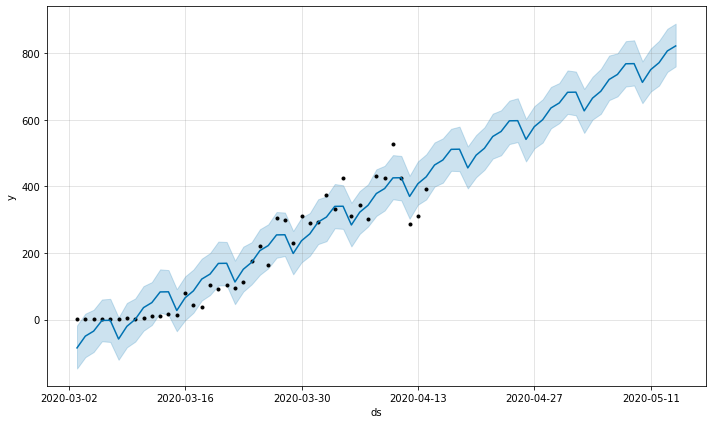

In [26]:
fig1 = m.plot(forecast)

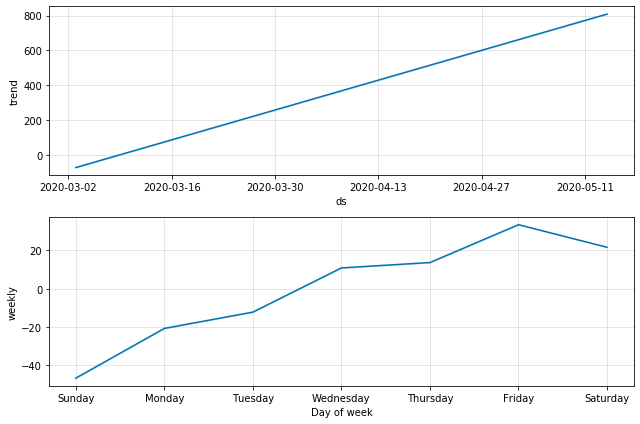

In [27]:
fig2 = m.plot_components(forecast)

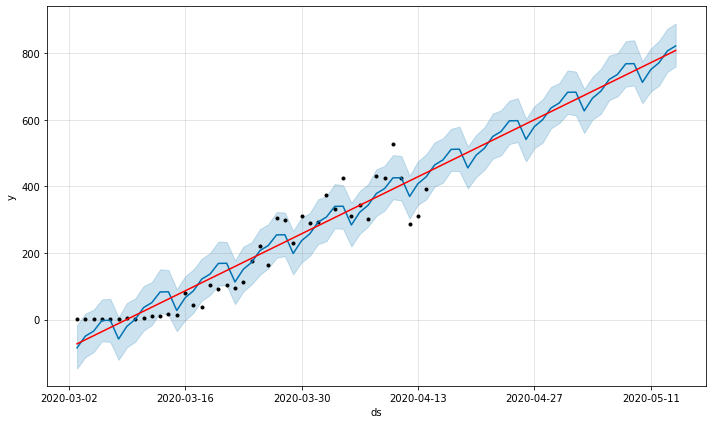

In [28]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)